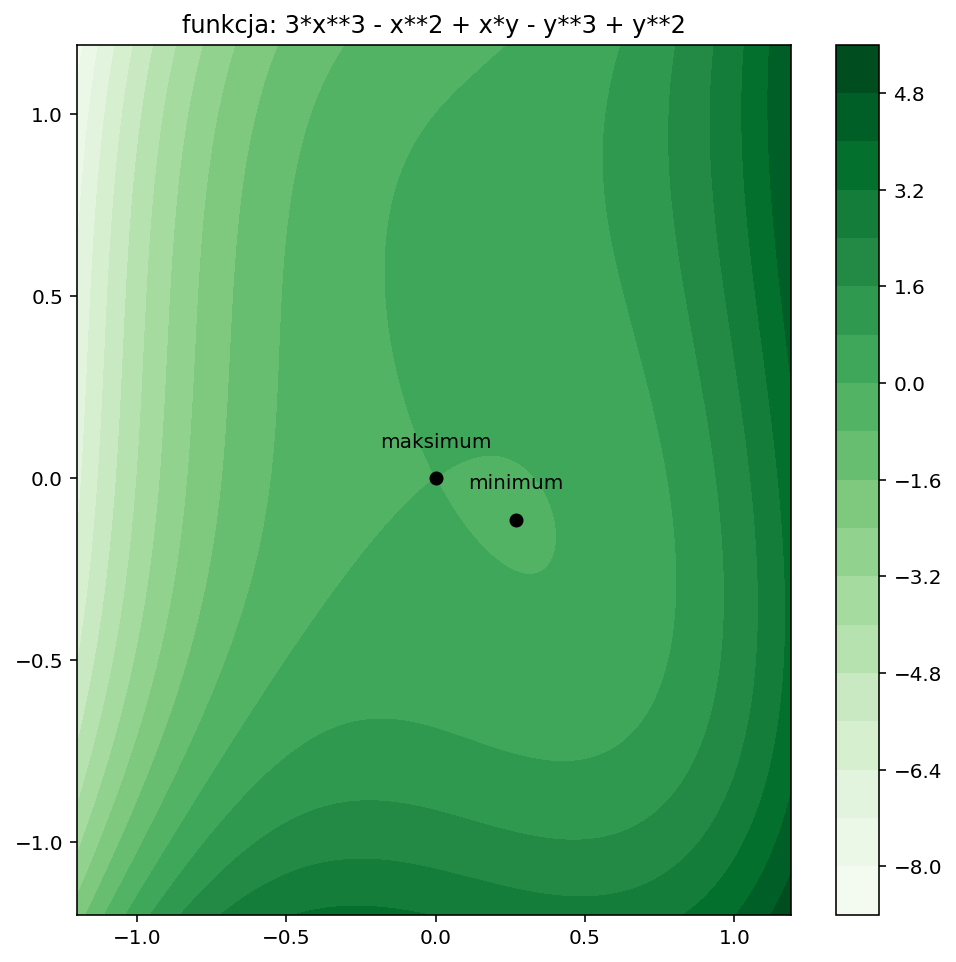

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, math, arange, linspace
from sympy import *
import sympy as sp
import math
from sympy import symbols, Eq, solve, det, Symbol

def funkcja(x,y):
    return 3*x**3 - x**2 + y**2 + x*y - y**3

x=np.arange(-1.2,1.2,0.01)
y=np.arange(-1.2,1.2,0.01)

X,Y=np.meshgrid(x,y)
Z=funkcja(X,Y)

x = Symbol('x')
y = Symbol('y')
f = funkcja(x,y)

#Pierwsza pochodna po x i y
fdx = diff(f,x)
fdy = diff(f,y)

#Szukanie punktów podejrzanych
eq1 = Eq(fdx, 0)
eq2 = Eq(fdy, 0)
sol = solve((eq1, eq2),(x, y))

#Druga pochodna po xx, xy, yx, yy
a = sp.diff(fdx, x)
b = sp.diff(fdx, y)
c = sp.diff(fdy, x)
d = sp.diff(fdy, y)

#Macierz i wyznacznik macierzy
B = sp.Matrix([[a,b], [c,d]]) 
dt = det(B)

def getText(dt):
  if dt < 0:
    return('maksimum')
  elif dt > 0:
    return('minimum')
  else:
    return('krytyczny')

ax=plt.subplots(figsize=(8,8))
plt.contourf(X,Y,Z,20,cmap='Greens')
plt.colorbar()
plt.title('funkcja: '+ str(f))

from sympy.abc import x, y
for i in range(len(sol)):
  pdet = dt.subs(x,sol[i][0]).subs(y,sol[i][1])
  try:
    plt.annotate(getText(pdet), xy = (sol[i][0], sol[i][1] + 0.1), ha="center", va="center", xytext = (sol[i][0] , sol[i][1] + 0.1))
    plt.plot(sol[i][0],sol[i][1], 'o', color = 'black')
  except:
    i = i
  finally:
    i = i

plt.savefig('09_lew_275116.pdf',dpi=300)